<a href="https://colab.research.google.com/github/ankitojha2705/advanced-dimensionality-reduction/blob/main/advanced_dimensionality_reduction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.7 MB/s eta 0:00:00
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


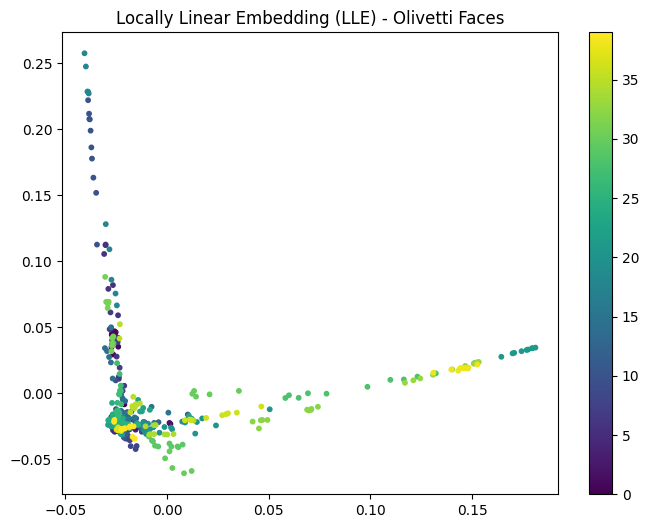

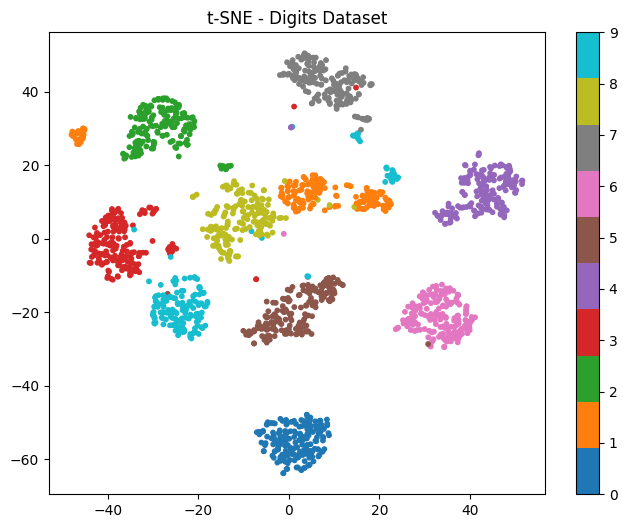

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


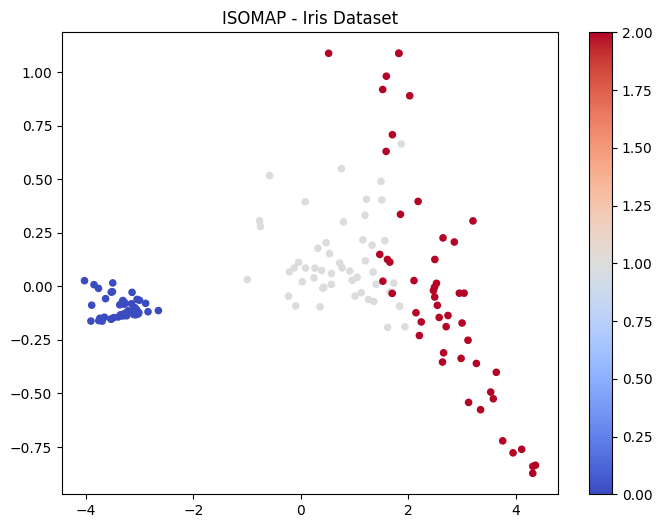

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


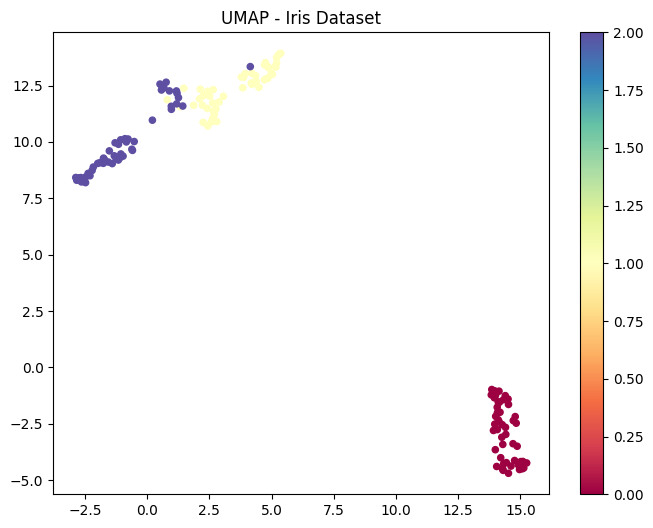

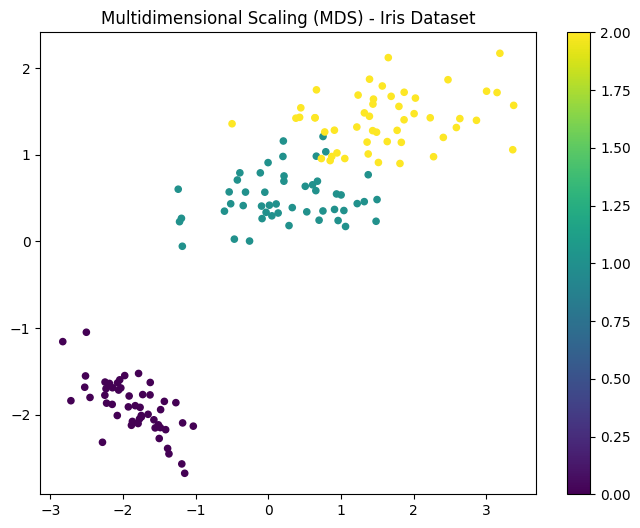

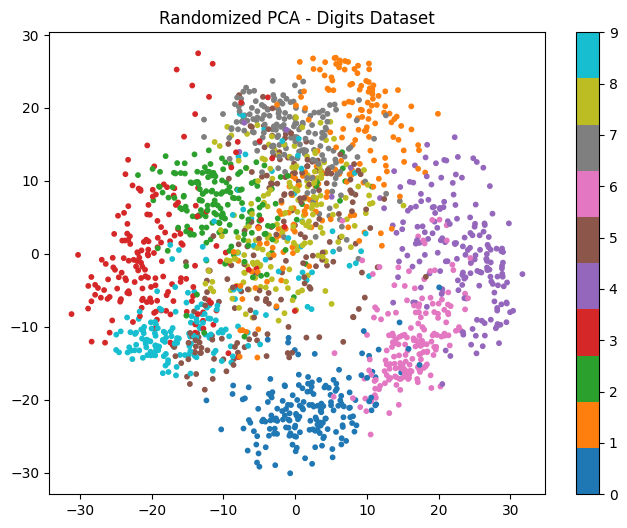

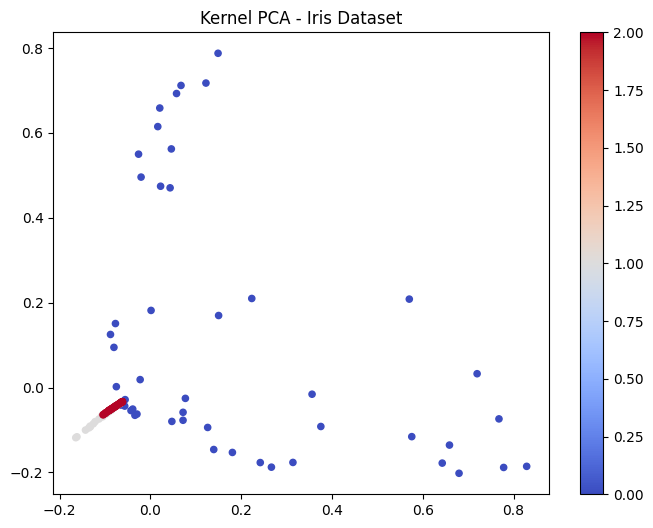

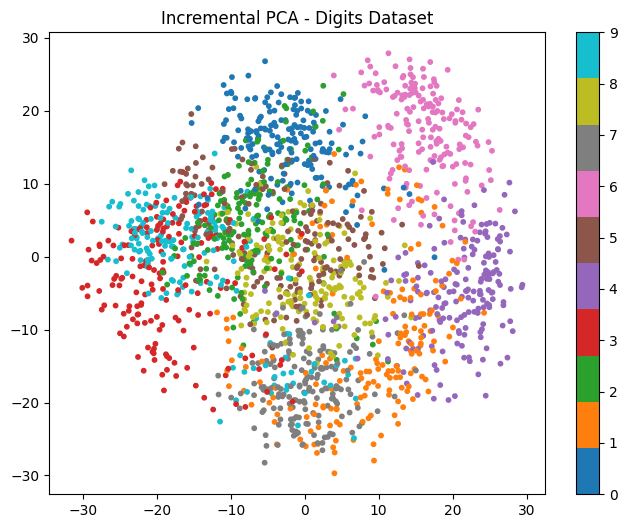

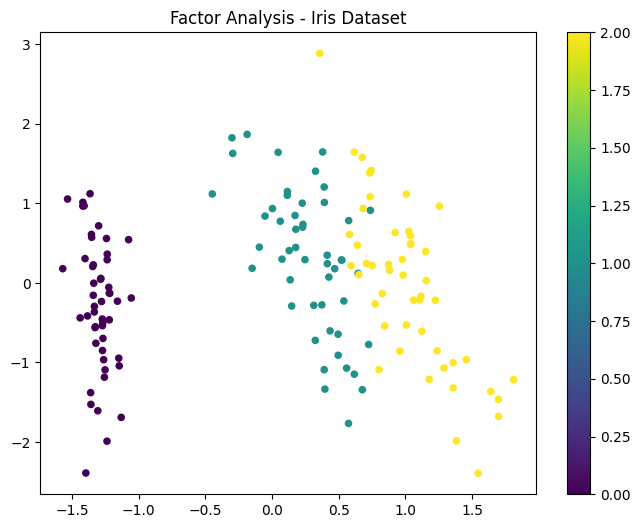

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


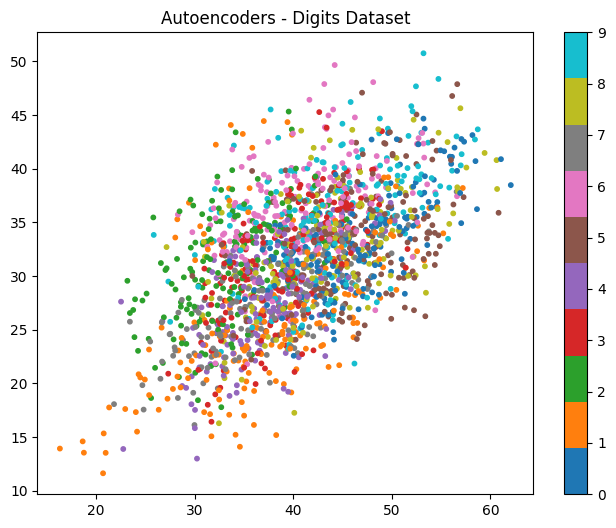

In [1]:
# Install necessary libraries
!pip install umap-learn plotly

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
import umap.umap_ as umap
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load Datasets
faces = datasets.fetch_olivetti_faces()
digits = datasets.load_digits()
iris = datasets.load_iris()

# 1. Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
faces_lle = lle.fit_transform(faces.data)
plt.figure(figsize=(8, 6))
plt.scatter(faces_lle[:, 0], faces_lle[:, 1], c=faces.target, cmap='viridis', s=10)
plt.title("Locally Linear Embedding (LLE) - Olivetti Faces")
plt.colorbar()
plt.show()

# 2. t-SNE (Interactive Visualization)
tsne = TSNE(n_components=2, random_state=42)
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(8, 6))
plt.scatter(digits_tsne[:, 0], digits_tsne[:, 1], c=digits.target, cmap='tab10', s=10)
plt.title("t-SNE - Digits Dataset")
plt.colorbar()
plt.show()

# 3. ISOMAP
isomap = Isomap(n_neighbors=10, n_components=2)
iris_isomap = isomap.fit_transform(iris.data)
plt.figure(figsize=(8, 6))
plt.scatter(iris_isomap[:, 0], iris_isomap[:, 1], c=iris.target, cmap='coolwarm', s=20)
plt.title("ISOMAP - Iris Dataset")
plt.colorbar()
plt.show()

# 4. UMAP (Interactive Visualization)
iris_umap = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42).fit_transform(iris.data)
plt.figure(figsize=(8, 6))
plt.scatter(iris_umap[:, 0], iris_umap[:, 1], c=iris.target, cmap='Spectral', s=20)
plt.title("UMAP - Iris Dataset")
plt.colorbar()
plt.show()

# 5. Multidimensional Scaling (MDS)
mds = MDS(n_components=2, random_state=42)
iris_mds = mds.fit_transform(iris.data)
plt.figure(figsize=(8, 6))
plt.scatter(iris_mds[:, 0], iris_mds[:, 1], c=iris.target, cmap='viridis', s=20)
plt.title("Multidimensional Scaling (MDS) - Iris Dataset")
plt.colorbar()
plt.show()

# 6. Randomized PCA
pca = PCA(n_components=2, svd_solver='randomized', random_state=42)
digits_pca = pca.fit_transform(digits.data)
plt.figure(figsize=(8, 6))
plt.scatter(digits_pca[:, 0], digits_pca[:, 1], c=digits.target, cmap='tab10', s=10)
plt.title("Randomized PCA - Digits Dataset")
plt.colorbar()
plt.show()

# 7. Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
iris_kpca = kernel_pca.fit_transform(iris.data)
plt.figure(figsize=(8, 6))
plt.scatter(iris_kpca[:, 0], iris_kpca[:, 1], c=iris.target, cmap='coolwarm', s=20)
plt.title("Kernel PCA - Iris Dataset")
plt.colorbar()
plt.show()

# 8. Incremental PCA
inc_pca = IncrementalPCA(n_components=2)
digits_inc_pca = inc_pca.fit_transform(digits.data)
plt.figure(figsize=(8, 6))
plt.scatter(digits_inc_pca[:, 0], digits_inc_pca[:, 1], c=digits.target, cmap='tab10', s=10)
plt.title("Incremental PCA - Digits Dataset")
plt.colorbar()
plt.show()

# 9. Factor Analysis
fa = FactorAnalysis(n_components=2, random_state=42)
iris_fa = fa.fit_transform(iris.data)
plt.figure(figsize=(8, 6))
plt.scatter(iris_fa[:, 0], iris_fa[:, 1], c=iris.target, cmap='viridis', s=20)
plt.title("Factor Analysis - Iris Dataset")
plt.colorbar()
plt.show()

# 10. Autoencoders
input_dim = digits.data.shape[1]
encoding_dim = 2
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(digits.data, digits.data, epochs=50, batch_size=256, shuffle=True, verbose=0)
digits_autoencoded = encoder.predict(digits.data)

plt.figure(figsize=(8, 6))
plt.scatter(digits_autoencoded[:, 0], digits_autoencoded[:, 1], c=digits.target, cmap='tab10', s=10)
plt.title("Autoencoders - Digits Dataset")
plt.colorbar()
plt.show()
